# Foundations of Stochastic

In this notebook, we will intensify our knowledge about the foundations of stochastic. 

At the start, we will introduce and analyze the properties of a binomial distribution.
Subsequently, we introduce and analyze normal distributions.
Finally, we will work with probability rules.

### **Table of Contents**
1. [Discrete Probabilities](#discrete-probabilities)
2. [Continuous Probabilities](#continuous-probabilities)
3. [Probability Rules](#probability-rules)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats
from ipywidgets import interactive, FloatSlider, IntSlider

### **1. Discrete Probabilities** <a class="anchor" id="discrete-probabilities"></a>

A discrete random variable $X$ taking values in the set $X(\Omega) = \{0, \dots, n\}, n \in \mathbb{N}_{\geq 0}$ is said to be binomially distributed $X \sim \mathrm{Bin}(n, p)$ with $n$ as the number of trials and $p \in [0, 1]$ as the success probability, if the *probability mass function (PMF) or probability distribution* $P(X)$ can be denoted by 

$P(X) = \binom{n}{k} p^k (1 - p)^{(n - k)}$

#### **Questions:**
1. (a) How can we prove that the PMF $P(X)$ of a binomially distributed variable $X \sim \mathrm{Bin}(n,p)$ is normalized? 

    *Remark: One can use the binomial expansion known from elementary algebra.* 
    
    TODO
    
    (b) Define the probability space $(\Omega, \mathcal{A}, P)$ and a random variable $X$ modeling the number of heads when tossing a coin five times.
    
    $\Omega = \{H, T\}$, $\mathcal{A} = \{\empty, \{H\}\}$
    
    (c) How can we derive the expected value $E(X)$ and the variance $V(X)$ of a binomially distributed variable $X \sim \mathrm{Bin}(n,p)$? 

    *Remark: A binomially distributed random variable can be represented through a sum of independent random variables following the same Bernoulli distribution, i.e.,* 
    $$X = \sum_{i=1}^n X_i \text{ with } \forall i \in \{1, \dots, n\}: X_i \sim \mathrm{Bern}(p).$$

    $\mathbb{E} = n * p$ 
    
    $\mathbb{V} = n * p * (1 - p)$

    (d) How can we estimate the expected value and variance of the Binomial distribution, when we have made the observations $x_1, \dots, x_N \in \{0, \dots, n\}$, $N \in \mathbb{N}_{>0}$?

    TODO

In the following, we use the [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/stats.html) package to plot the binomial distribution for different values of $n$ and $p$.

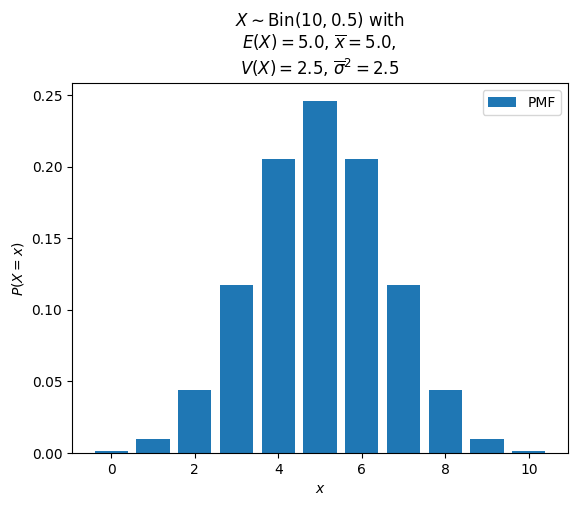

interactive(children=(IntSlider(value=10, description='n', min=1), FloatSlider(value=0.5, description='p', max…

In [5]:
def visualize_binomial_distribution(n, p, N):
    """
    Visualizes the binomial distribution for varying parameters and
    indicates summary statistics, i.e., (empirical) mean and (empirical variance).
    
    Parameters
    ----------
    n : int
        Positive number of trials within one binomial experiment.
    p : float in [0, 1]
        Success probability.
    N : int
        Positive number of repeated binomial experiments.
    """
    # Compute the expected value `mean` and the variance `var`.
    #mean = n  * p
    mean = stats.binom.mean(n, p)
    #var = n * p * (1 - p)
    var = stats.binom.var(n, p)

    # Draw N observations `x_sampled` from the PMF P(X) with X ~ Bin(n, p).
    
    #TODO

    # Estimate the expected value `mean_est` and variance `var_est` using the observations.
    mean_est = n * p
    var_est = n * p * (1 - p)
    #TODO
    
    # Create an array `x` containing the numbers {0, ..., n}.
    x = np.arange(n+1)
    
    # Compute P(X=x) as `p_x` with x in {0, ..., n} for X ~ Bin(n, p)
    p_x = stats.binom.pmf(x, n, p)
    
    # Plot results.
    plt.bar(x, p_x, label=f'PMF')
    plt.xlabel('$x$')
    plt.ylabel('$P(X=x)$')
    plt.title(
        "$X \sim \mathrm{Bin}(" 
        + str(n) + "," 
        + str(p) 
        + ")$ with \n$E(X) =$" 
        + str(np.round(mean, 2)) 
        + ", $\overline{x} =$" 
        + str(np.round(mean_est, 2)) 
        + ", \n$V(X) = $" 
        + str(np.round(var, 2))
        + ", $\overline{\sigma}^2 =$" 
        + str(np.round(var_est, 2)) 
    )
    plt.legend()
    plt.show()
    
visualize_binomial_distribution(10, 0.5, 10)

interactive(
    visualize_binomial_distribution, 
    n=IntSlider(value=10, min=1, max=100),
    p=FloatSlider(value=0.5, min=0.0, max=1.0),
    N=IntSlider(value=10, min=2, max=1000)
)

#### **Questions:**
1. (c) How does the sample size $N$ affect the estimates of the empirical mean and variance?
   
    Larger N leads to better estimation


### **2. Continuous Probabilities** <a class="anchor" id="continuous-probabilities"></a>

A continuous random variable $X$ taking any value in the set $X(\Omega) = \mathbb{R}$ is said to be rectangularly (uniformly) distributed $X \sim \mathrm{Rect}(a, b)$ with $a, b \in \mathbb{R}, a < b$ as its parameters, if the *probability density function (PDF)* $f(X)$ can be denoted by 

$f(x) = \frac{1}{b-a}$ if $a \leq x \leq b$, $0$ else

#### **Questions:**
2. (a) How can we show that the PDF of the rectangularly distributed random variable $X \sim \mathrm{Rect}(a,b)$ is a valid PDF?
   
    TODO

**Definition 2.17** <font color='red'>**Multivariate Normal Distribution**</font> 

A multivariate continuous random variable $\mathbf{X} = (X_1, \dots, X_D)^\mathrm{T}, D \in \mathbb{N}_{>0}$ follows a *multivariate normal distribution* with the mean $\boldsymbol{\mu} \in \mathbb{R}^D$ and the symmetric, positive-definite covariance matrix $\boldsymbol{\Sigma} \in \mathbb{R}^{D \times D}$
if the PDF is defined through
$$
f(\mathbf{X}=\mathbf{x}) = \frac{1}{(2\pi)^{\frac{D}{2}}} \cdot \frac{1}{|\boldsymbol{\Sigma}|^{\frac{1}{2}}} \cdot \exp\left(-\frac{1}{2} (\mathbf{x} - \boldsymbol{\mu})^\mathrm{T} \boldsymbol{\Sigma}^{-1} (\mathbf{x} - \boldsymbol{\mu})\right),
$$
where $|\boldsymbol{\Sigma}|$ denotes the determinant of the covariance matrix and $\boldsymbol{\Sigma}^{-1}$ its inverse.

**Remarks:**
- The normal distribution, also known as the Gaussian distribution, is one of the most important probability distributions in stochastic. It is used in a wide range of fields to model the distribution of random variables that arise in nature, such as the heights of people, the weights of objects, and the errors in measurements.
- We denote $\mathbf{X} \sim \mathcal{N}(\boldsymbol{\mu}, \boldsymbol{\Sigma})$ to indicate that a random variable follows a multivariate normal distribution.
- The inverse of the covariance matrix, i.e., $\boldsymbol{\Sigma}^{-1}$, is also named precision matrix.

#### **Questions:**
2. (b) Which form does the PDF of a univariate normal distribution ($D=1$) take?
   
    $f(X = x) = \frac{1}{\sigma \sqrt{2 \pi }} e^{-\frac{1}{2} (\frac{x - \mu}{\sigma})^2}$


In [9]:
def visualize_normal_distribution(mu, sigma, N):
    """
    Visualizes the univariate normal distribution for varying parameters and
    indicates summary statistics, i.e., (empirical) mean and (empirical) variance.
    
    Parameters
    ----------
    mu : float
        Mean of the normal distribution.
    sigma : float
        Standard deviation of the normal distribution.
    N : int
        Positive number of repeated binomial experiments.
    """
    # Draw N observations `x_sampled` from the pdf f(X) with X ~ N(mu, sigma**2).
    # TODO
    
    # Estimate the expected value `mean_est` and variance `var_est` using the observations.
    mean_est = mu
    var_est = sigma
    # TODO
    
    # Create an array `x` of 1000 linearly distributed values in the range [-5, 5].
    x = np.arange(-5.0, 5.0, 0.01)
    print(len(x))
    
    # Compute the density f(X=x) as `f_x` for all values in `x`.
    f_x = stats.norm(mu, sigma).pdf(x)

    # Plot the f(x) for mu and sigma over all values in `x`.
    plt.plot(x, f_x, label=f'PDF')
    plt.xlabel('$x$')
    plt.ylabel('$f(X=x)$')
    plt.title(
        "$X \sim \mathcal{N}(" 
        + str(mu) + "," 
        + str(np.round(sigma**2, 2)) 
        + ")$ with \n$\overline{x} =$" 
        + str(np.round(mean_est, 2)) 
        + ", \n$\overline{\sigma}^2 =$" 
        + str(np.round(var_est, 2)) 
    )
    plt.legend()
    plt.show()

interactive(
    visualize_normal_distribution, 
    mu=FloatSlider(value=0, min=-2, max=2),
    sigma=FloatSlider(value=1, min=0.1, max=2),
    N=IntSlider(value=10, min=2, max=1000)
)

interactive(children=(FloatSlider(value=0.0, description='mu', max=2.0, min=-2.0), FloatSlider(value=1.0, desc…

#### **Questions:**
2. (c) How do the parameters $\mu$ and $\sigma^2$ affect the shape of the PDF of the normal distribution?

   mu shift right and left, sigma controlls the width of the distribution

Even for the univariate case $D=1$, the CDF of the normal distribution cannot be expressed in terms of elementary functions. However, many numerical approximations are known. A typical approach is to transform any univariate normal distribution into a standard normal distribution.

**Definition 2.18** <font color='red'>**Standard Normal Distribution**</font> 

The univariate normal distribution $\mathcal{N}(0, 1)$ is called *standard normal distribution* and its CDF is denoted as $\Phi: \mathbb{R} \rightarrow [0, 1]$.

For computing the probabilities of a random variable $X \sim \mathcal{N}(0, 1)$, there are [lookup tables](https://en.wikipedia.org/wiki/Standard_normal_table) and any random variable following a univariate normal distribution can be transformed to follow the standard normal distribution.

**Theorem 2.10** <font color='red'>**Transformation to a Standard Normal Distribution**</font> 

Let $X \sim \mathcal{N}(\mu, \sigma^2)$ be a random variable following the univariate normal distribution $\mathcal{N}(0, 1)$. Then, we get:
$$
F(X=x) = \Phi\left(\frac{x-\mu}{\sigma}\right).
$$

**Remark**: The standard normal distribution is symmetric such that $\forall x \in \mathbb{R}: \Phi(-x) = 1 - \Phi(x)$. 

#### **Questions:**

2. (d) Does it hold that for a random variable $X$ with $E(X)=\mu$ and $V(X)=\sigma^2$, we get $E(Z)=0$ and $V(Z)=1$ for $Z=\frac{(X-\mu)}{\sigma}$? Prove your answer.

   TODO
   
   (e) What is the probability of $1 \leq X < 6$ for $X \sim \mathcal{N}(2, 4)$? Answer this question by using the standard normal distribution with a [lookup table](https://en.wikipedia.org/wiki/Standard_normal_table).
   
   $ = P(X \leq 6) - P(X \leq 1) = P(X \leq \frac{6-2}{\sqrt{4}}) - P(X \leq \frac{1-2}{\sqrt{4}}) = P(X \leq 2) - P(X \leq -\frac{1}{2}) = 0.97724 - 0.30853 = 0.66871$
   
In the following, we use the [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/stats.html) package to verify the result in question 2(d).

In [10]:
# Compute the probability P(1 <= X < 6) for X ~ N(2, 4).
p_6 = stats.norm(2, np.sqrt(4)).cdf(6)
p_1 = stats.norm(2, np.sqrt(4)).cdf(1)
p = p_6 - p_1
print(f"P(1 <= X < 6) = {p_6} - {p_1} = {p}")

P(1 <= X < 6) = 0.9772498680518208 - 0.3085375387259869 = 0.6687123293258339


One of the main reasons the normal distribution is so widely used is due to the central limit theorem.

**Theorem 2.11** <font color='red'>**Central Limit Theorem**</font> 

Let $X_1, X_2, \dots $ be a sequence of i.i.d. random variables. Further, assume that the expected value $E(X_1) = \mu$ and the variance $\sigma^2 = V(X_1)$ exist. Then, the random variable $S_N = X_1 + \dots + X_N, N \in \mathbb{N}_{>0}$ has an expected value of $E(S_N) = N\mu$ and a variance of $V(S_N) = N\sigma^2$. If one forms from it the standardized random variable
$$
Z_N = \frac{S_N - N\mu}{\sigma\sqrt{N}},
$$
then the central limit theorem states that the CDF of $Z_N$ for $N \rightarrow \infty$ pointwisely converges to the CDF $\Phi$ of the standard normal distribution $\mathcal{N}(0,1)$:
$$
\lim_{N \rightarrow \infty} F(Z_n = z) = \Phi(z).
$$

**Remarks:** 
- Intuitively, the theorem states that, under certain conditions, the sum of numerous i.i.d. random variables tends towards a normal distribution. This makes the normal distribution a natural choice for modeling a wide range of phenomena that arise in nature.
- The earliest version of this theorem, that the normal distribution may be used as an approximation to the binomial distribution, is the de Moivre–Laplace theorem.

**Theorem 2.12** <font color='red'>**De Moivre-Laplace Theorem**</font> 

Let $X \sim \mathrm{Bin}(n, p)$ be a random variable with the expected value $E(X)=\mu$ and the variance $V(X) = \sigma$. Then, for a sufficiently large $n$ we can make the following approximation:
$$
F(X=x) = P(X \leq x) \approx \Phi\left(\frac{x-\mu}{\sigma}\right).
$$

**Remark**: The following condition can serve as a rule of thumb for the application of the de Moivre-Laplace theorem
$$
V(X) = n \cdot p \cdot (1-p) > 9.
$$

In the following, we use the [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/stats.html) package to compare the actual CDF of the binomial distribution with the one approximated via the de Moive-Laplace theorem.

In [12]:
def visualize_de_moive_laplace_theorem(n, p):
    """
    Compares the CDF of the binomial distribution with the
    approximation using the de Moivre-Laplace theorem.
    
    Parameters
    ----------
    n : int
        Positive number of trials within one binomial experiment.
    p : float in [0, 1]
        Success probability.
    """
    # Compute the expected value `mean` and the variance `var`.
    mean = n * p
    var = n * p * (1-p)
    
    # Create `x_bin` array containing the numbers {0, ..., n}.
    x_bin = np.arange(n+1)
     
    # Compute F(X=x) as `f_x_bin` with x in {0, ..., n} for X ~ Bin(n, p)
    f_x_bin = stats.binom.cdf(x_bin, n, p)
    
    # Create an array `x_norm` containing 10*n values evenly distributed across the interval [0, n].
    x_norm = np.arange(0, n, 1/(10*n))
    
    # Use the de Moivre-Laplace theorem to approximate `f_x_bin` via `f_x_norm`.
    f_x_norm = stats.norm.cdf(x_norm, mean, var)
    
    # Plot results.
    plt.bar(x_bin, f_x_bin, label=f'CDF of binomial distribution', color="blue", alpha=0.5)
    plt.plot(x_norm, f_x_norm, label=f'CDF of normal distribution', color="red")
    plt.xlabel('$x$')
    plt.ylabel('$F(X=x)$')
    plt.title(
        "$X \sim \mathrm{Bin}(" 
        + str(n) + "," 
        + str(p) 
        + ")$ with \n$E(X) =$" 
        + str(np.round(mean, 2)) 
        + ", \n$V(X) = $" 
        + str(np.round(var, 2))
    )
    plt.legend()
    plt.show()
    
interactive(
    visualize_de_moive_laplace_theorem, 
    n=IntSlider(value=10, min=1, max=100),
    p=FloatSlider(value=0.5, min=0.0, max=1.0),
    N=IntSlider(value=10, min=2, max=1000)
)

interactive(children=(IntSlider(value=10, description='n', min=1), FloatSlider(value=0.5, description='p', max…

For the multivariate normal distribution, the covariance matrix $\boldsymbol{\sigma}$ plays a critical role regarding the distribution's shape. For a better understanding, we use the [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/stats.html) package to study the influence of this matrix in the bivariate ($D=2$) case.

In [19]:
def visualize_bivariate_normal_distribution(mean_x, mean_y, var_x, var_y, cov_xy, N):
    """
    Visualizes the bivariate normal distribution for varying parameters.
    
    Parameters
    ----------
    mean_x : float
        Mean of the normal distribution in the x-dimension.
    mean_y : float
        Mean of the normal distribution in the y-dimension
    var_x : float
        Variance of the normal distribution in the x-dimension.
    var_y : float
        Variance of the normal distribution in the y-dimension.
    cov_xy : float
        Covariance of the normal distribution between the x- and y-dimension.
    N : int
        Positive number of observations to be drawn from the normal distribution.
    """
    # Create the `mu` vector as numpy.ndarray.
    mu = np.array([mean_x, mean_y])
    
    # Create the `Sigma` matrix as numpy.ndarray.
    sigma = np.array([[var_x, cov_xy], [cov_xy, var_y]])
    
    # Print error message if `Sigma` is not positiv definite.
    if(np.all(np.linalg.eigvals(sigma) > 0)):
        print("Sigma is not positive definite")
    
    # Draw N observations `X_sampled` from the PDF f(X) with X ~ Norm(mu, Sigma). ??????????????????????????????????????????????????????????????????????????
    x = np.random.uniform(low=-10, high=10, size=(N, 2))
    print(x)
    x_sampled = stats.multivariate_normal.pdf(x, mu, sigma)
    print(x_sampled)
    
    # Plot sampled observations.
    plt.scatter(x_sampled[:, 0], x_sampled[:, 1], label="sampled observations")
    plt.xlim([-10, 10])
    plt.ylim([-10, 10])
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.title(
        "$X \sim \mathcal{N}(\mathbf{\mu}, \mathbf{\Sigma})$"
    )
    plt.legend()
    plt.show()

interactive(
    visualize_bivariate_normal_distribution, 
    mean_x=FloatSlider(value=0, min=-4, max=4),
    mean_y=FloatSlider(value=0, min=-4, max=4),
    var_x=FloatSlider(value=1, min=0.1, max=4),
    var_y=FloatSlider(value=1, min=0.1, max=4),
    cov_xy=FloatSlider(value=0, min=-4, max=4),
    N=IntSlider(value=1000, min=2, max=10000)
)

interactive(children=(FloatSlider(value=0.0, description='mean_x', max=4.0, min=-4.0), FloatSlider(value=0.0, …

#### **Questions:**
2. (f) How do the elements of the covariance matrix $\boldsymbol{\Sigma}$ affect the shape of the PDF of the normal distribution?

   TODO
   
### **3. Probability Rules** <a class="anchor" id="probability-rules"></a>
Consider the following bivariate PMF $P(X, Y)$ of two discrete random variables $X$ and $Y$ with $X(\Omega) = \{x_1, x_2, x_3, x_4\}$ and $Y(\Omega) = \{y_1, y_2, y_3\}$:

| $P(X=x_i, Y=y_i)$      | $x_1$ | $x_2$ | $x_3$ | $x_4$ |
|------------------------|-------|-------|-------|-------|
| $y_1$                  | 0.01  | 0.2   | 0.1   | 0.1   |
| $y_2$                  | 0.05  | 0.05  | 0.07  | 0.2   |
| $y_3$                  | 0.1   | 0.03  | 0.05  | 0.04  |

#### **Questions:**
3. (a) How can we compute the marginal PMFs $P(X)$ and $P(Y)$?
    
    TODO
    
   (b) How can we compute the conditional PMFs $P(X \mid Y=y_1)$ and $P(Y \mid X=x_3)$?
    
    TODO
    
     (b) Are the random variables $X$ and $Y$ statistically independent?
    
    TODO
